In [1]:
"""
To run this:
srun --pty --partition=gpu-2080ti-interactive singularity exec  \
    -B /mnt/qb/bethge/gpachitariu37/datasets/imagenet_c \
    docker://georgepachitariu/bethgelab-tools \
    python read_pytorch.py
"""

from PIL import Image
import numpy as np, io
import torch, torchvision.transforms as trn
from tfrecord.torch.dataset import TFRecordDataset
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

#imagenetc_path = '/mnt/qb/bethge/gpachitariu37/datasets/imagenet_c/'
imagenetc_path = '/home/george/datasets/tfrecord/'

# TFRecordDataset object reads records from TFRecords files and passes them to PyTorch.
def load_dataset(transform=None):
    filename="zoom_blur_1"
    return TFRecordDataset(
                    data_path=imagenetc_path+filename+'.tfrecords', 
                    index_path=imagenetc_path+filename+'.tfrecords_index',
                    description={ 'height': 'int',
                                'width':  'int',
                                'depth':  'int',
                                'corruption_type': 'byte',
                                'severity_level' : 'int',
                                'class_label': 'byte',
                                'image_raw':  'byte' }, 
                    transform=transform)

In [2]:
# Print the value of corruption_type column from the first record (image)
raw_dataset = load_dataset()
raw_loader = torch.utils.data.DataLoader(raw_dataset, batch_size=1, shuffle=False, num_workers=1)
first_record = next(iter(raw_loader))
print('1. First record corruption type: ', end=' ')
print(first_record['corruption_type'].numpy().tobytes().decode("utf-8"))

/home/george/anaconda3/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:63: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return default_collate([torch.as_tensor(b) for b in batch])
1. First record corruption type:  zoom_blur


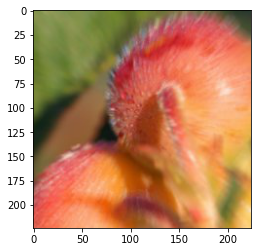

In [3]:
#Use transforms
transformed_dataset = load_dataset( transform=trn.Compose([ 
                    lambda record: Image.open(io.BytesIO(record["image_raw"].tobytes())),
                    trn.ToTensor(),
                    trn.CenterCrop(224), 
                    ]))
transformed_loader = torch.utils.data.DataLoader(transformed_dataset, batch_size=1, 
                                                 shuffle=False, num_workers=1)
transformed_record = next(iter(transformed_loader))
plt.imshow(transformed_record.squeeze().permute(1,2,0))
plt.show()
